In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "/Users/Alexander/Documents/MSP/PRA1500 Tools for Practical Physics/Session 1 - Intro to tools/Least Squares Analysis Data.csv"

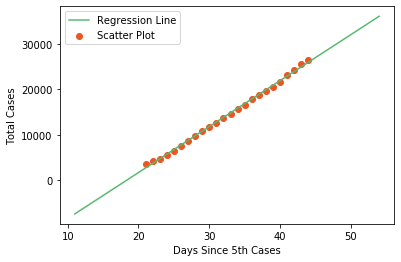

Root Mean Square Error:  342.2836297317859
R squared:  0.9976325063632039
Gradient:  1015.0413043478261
y-intercept:  -18638.134057971016
The error in the gradient is  10.542205776003259
The error in the y-intercept is  350.3069915282229
The percentage error in the gradient is  1.0385986984812139
The percentage error in the y-intercept is  1.8795175012619156


In [23]:
def Least_Squares_Analysis(path,dependant,independant,lower,upper):
    
    covid_data = pd.read_csv(path)
        
    # Setting the x and y arrays and getting rid of the first 20 data points
    y = covid_data[dependant].values[lower:upper]
    x = covid_data[independant].values[lower:upper]
    
    # Calculating their mean
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    n = len(x)
    
    numerator = 0
    denomenator = 0
    #Calculating the gradient and the y-interept
    for i in range(n):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        denomenator += (x[i] - x_mean)**2
        m = numerator / denomenator
        c = y_mean - (m * x_mean)
    
    max_x = np.max(x) + 10
    min_x = np.min(x) - 10
    
    lin = np.linspace(min_x,max_x,1000)
    curve = m * lin + c
    
    # Calculating Root Mean Squares Error
    rmse = 0
    for i in range(n):
        y_pred = c + m * x[i]
        rmse += (y[i] - y_pred) ** 2
    rmse = np.sqrt(rmse/n)
    
    # Calculating R^2 Score
    ss_tot = 0
    ss_res = 0
    for i in range(n):
        y_pred = c + m * x[i]
        ss_tot += (y[i] - y_mean) ** 2
        ss_res += (y[i] - y_pred) ** 2
    r2 = 1 - (ss_res/ss_tot)
    
    # Calculating the error for the gradient and y-intercept
    s = np.sqrt((ss_tot-m*numerator)/(n-2))
    error_gradient = s/np.sqrt(denomenator)
    error_intercept = s*np.sqrt((1/n) + (x_mean**2)/denomenator)

    
    return lin,curve,x,y,rmse,r2,m,c,error_gradient,error_intercept
    

# independant = input("What's the column name for the independant variable? ")
# dependant = input("What's the column name for the dependant variable? ")
# lower_limit = int(input("From which index do you want to start the regression? "))
# upper_limit = int(input("Which index do you want the regression to finish on? "))
independant = "Days Since 5th Case"
dependant = "Total Cases"
lower_limit = 0
upper_limit = 24

# Ploting Line
x,y,X,Y,rmse,r2,m,c,error_m,error_c = Least_Squares_Analysis(path,dependant,independant,lower_limit,upper_limit)


plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Days Since 5th Cases')
plt.ylabel('Total Cases')
plt.legend()
plt.show()
print("Root Mean Square Error: ",rmse)
print("R squared: ",r2)
print("Gradient: ",m)
print("y-intercept: ",c)
print("The error in the gradient is ",error_m)
print("The error in the y-intercept is ",error_c)
print("The percentage error in the gradient is ",(error_m/m)*100)
if (c < 0):
    print("The percentage error in the y-intercept is ",(error_c/c)*-100)
else:
    print("The percentage error in the y-intercept is ",(error_c/c)*100)